## Model for damage (amount)
- do a better model for predicting binary data
- take care only for those who are predicted to be 


3) predict which clients will cause damage
- choose an algorithm, and train it in an optimal way
- score the 500 applicants 
  
4) for those thatwill wreak havoc, predict the amount of damage they will cause
- choose an algorithm, and train it in an optimal way 
- score the 500 applicants

5) create a measure of the expected value of eachapplicant, and create an optimal selection of 200 guests

In [1]:
import numpy as np
import pandas as pd
import getpass
from pathlib import Path

from sklearn.model_selection import train_test_split

print(pd.__version__)

1.2.4


In [2]:
def read_data(type,train_name, score_name):
    if getpass.getuser() == 'daniel':
        project_root_path = Path("/home/daniel/Projects/Python ML Pipeline")
        csv_path = project_root_path / 'data' / type
        # Lets read the trining dataset
        data = pd.read_csv(csv_path/  train_name)
        # Now we read the training data set
        score = pd.read_csv(csv_path /  score_name)
    return (data,score)
  
def read_pkl(train_name, score_name,  project_root_path = "/home/daniel/Projects/Python ML Pipeline"):
    if getpass.getuser() == 'daniel':
        project_root_path = Path(project_root_path)
        pkl_path = project_root_path / 'data' /'processed'
        # Lets read the trining dataset
        data = pd.read_pickle(pkl_path/  train_name)
        # Now we read the training data set
        score = pd.read_pickle(pkl_path /  score_name)
    return (data,score)

In [6]:
data_dict = {'type': 'raw', 'train_name': 'train_V2.csv', 'score_name': 'score.csv'}
data_raw, score_raw = read_data(**data_dict)
target_raw = data_raw[ 'outcome_damage_inc']
target_raw.value_counts(dropna=False)


0    3723
1    1277
Name: outcome_damage_inc, dtype: int64

In [27]:

data_target  = data_raw[['outcome_profit', 'outcome_damage_inc', 'outcome_damage_amount']].copy()
vec = data_target['outcome_profit'].sub(data_target['outcome_damage_amount'], fill_value=np.NAN)
data_target["abs_value"] = vec
data_target["vec_zscore"] = (vec - vec.mean())/vec.std()
client_labels = ["very bad","bad" ,"average", "good","very good"]
data_target["client_classes"] = pd.qcut(vec, 5, labels = client_labels )


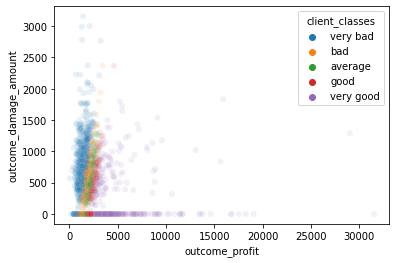

In [30]:
import seaborn as sns
splot = sns.scatterplot(x='outcome_profit',y= 'outcome_damage_amount',alpha=0.1, hue = 'client_classes', data=data_target)


/home/daniel/.pyenv/versions/3.8.10/envs/ml-in-python/lib/python3.8/site-packages/seaborn/axisgrid.py:2094: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): hist_kws.
  warnings.warn(msg, UserWarning)


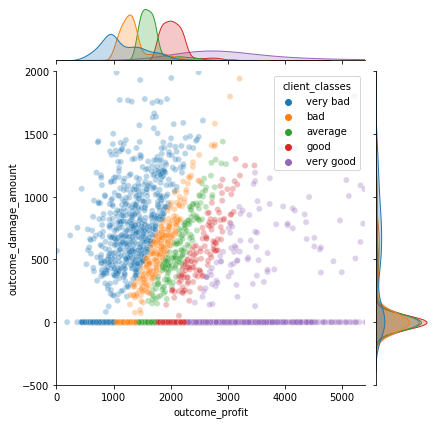

In [53]:
marginal_kws={'hist_kws': {'bins': 30, 'fill': True}}
plot =  sns.jointplot(
    data=data_target,
    x='outcome_profit',y= 'outcome_damage_amount',alpha=0.3,marginal_kws=marginal_kws, hue = 'client_classes', 
    
)

plot.ax_marg_x.set_xlim(0, 5400)
plot.ax_marg_y.set_ylim(-500, 2000)
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

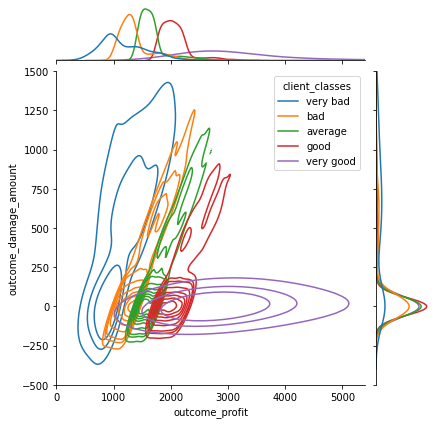

In [42]:

plot =  sns.jointplot(
    data=data_target,
    x='outcome_profit',y= 'outcome_damage_amount', hue = 'client_classes', 
    kind="kde"
)

plot.ax_marg_x.set_xlim(0, 5400)
plot.ax_marg_y.set_ylim(-500, 1500)
plt.rcParams["figure.figsize"] = (20,10)
plt.show()


<AxesSubplot:title={'center':'Title of the first chart'}, xlabel='abs_value', ylabel='Density'>

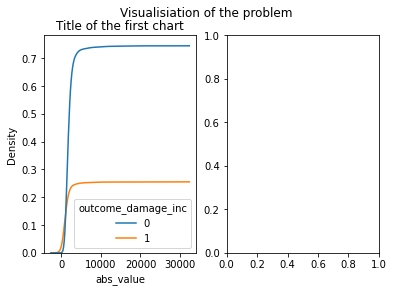

In [17]:

from matplotlib import pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1, 2)
fig.suptitle('Visualisiation of the problem')
axes[0].set_title('Title of the first chart')
sns.kdeplot(data= data_target, x="abs_value", hue="outcome_damage_inc",  cumulative=True, common_norm=True, common_grid=True, ax=axes[0])

In [ ]:

data_dict = {'train_name': 'data_train_v3.pkl', 'score_name': 'score_v3.pkl'}
data_train, score = read_pkl(**data_dict)

In [ ]:
#fig, axes = plt.subplots(1, 2)
from matplotlib import pyplot as plt

fig.suptitle('1 row x 2 columns axes with no data')

splot =  splot.set(xscale="log")

Inbalance of classes  - classes here are inbalancesd

In [ ]:
target_outcome  = data_train[data_train[ 'outcome_damage_inc'] ==1]['outcome_damage_amount']
import matplotlib
_ = target_outcome.hist()


In [ ]:
target

In [ ]:
target_damage = data_train[ 'outcome_damage_inc']
target.value_counts(dropna=False)


In [ ]:
_ = data_train['outcome_profit'].hist()

In [ ]:
_ = data_train.hist(figsize=(20, 14))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_train.drop(['outcome_profit', 'outcome_damage_inc', 'outcome_damage_amount'],1),
                                                    data_train['outcome_damage_inc'], test_size=0.2, random_state=48)
data_train.outcome_damage_inc.value_counts()

preprocessing.LabelEncoder() - convert string or float values to 0 .. n classes.

If we put as imput X_train, y_train to fit method it cause error. To avoid it we will convert and encode labels.

In [ ]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
# this seems to be unnecessary

In [ ]:
y_train.head()

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 50)]
learning_rate = [x for x in np.logspace(start = -3, stop = -0.01, num = 50)]
max_features = ['auto']
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]
min_samples_split = [2, 5, 10, 30]
min_samples_leaf = [1, 2, 4, 10, 30]
subsample = [0.4, 0.6, 0.8, 1]
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'subsample': subsample}
gbm = GradientBoostingClassifier()
gbm_random = RandomizedSearchCV(estimator = gbm, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=4872, n_jobs = -1)
gbm_random.fit(X_train, y_train)
gbm_random.best_params_

In [ ]:
params = gbm_random.best_params_
gbm_damagebin = GradientBoostingClassifier(**params)
gbm_damagebin.fit(X_train, y_train)
print('Train accuracy: %.3f' % gbm_damagebin.score(X_train, y_train))
print('Test accuracy: %.3f' % gbm_damagebin.score(X_test, y_test))

In [ ]:
damagebin_preds = gbm_damagebin.predict_proba(score)

# Model for damage (amount)


In [ ]:
from sklearn.model_selection import train_test_split
data_dam = data_train[data_train.outcome_damage_inc == 1]
data_dam.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_dam.drop(['outcome_profit', 'outcome_damage_inc', 'outcome_damage_amount'],1), 
                                                    data_dam['outcome_damage_amount'], test_size=0.2, random_state=29949)

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 50)]
learning_rate = [x for x in np.logspace(start = -3, stop = -0.01, num = 50)]
max_features = ['auto']
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]
min_samples_split = [2, 5, 10, 30]
min_samples_leaf = [1, 2, 4, 10, 30]
subsample = [0.4, 0.6, 0.8, 1]
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'subsample': subsample}
gbm = GradientBoostingRegressor()
gbm_random = RandomizedSearchCV(estimator = gbm, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=4872, n_jobs = -1)
gbm_random.fit(X_train, y_train)
gbm_random.best_params_

In [ ]:
params = gbm_random.best_params_
gbm_damageam = GradientBoostingRegressor(**params)
gbm_damageam.fit(X_train, y_train)
print('R2: %.3f' % gbm_damageam.score(X_train, np.array(y_train).reshape(-1,1)))
print('R2: %.3f' % gbm_damageam.score(X_test, np.array(y_test).reshape(-1,1)))
damageam_preds = gbm_damageam.predict(score)

# Answering the last question

In [ ]:
data_output_path = "/home/daniel/Projects/Python ML Pipeline/data/processed/"
path = data_output_path + "profit_preds_v3.pkl.npy"


In [ ]:
profit_preds = np.load(path)
pred_all = pd.Series(profit_preds - [x[1] for x in damagebin_preds] * damageam_preds)
pred_allexp_profit = pd.Series(profit_preds - [x[1] for x in damagebin_preds] * damageam_preds)
exp_profit.index = score.index
score['exp_profit'] = exp_profit

In [ ]:
pred_all.hist()

In [ ]:
exp_profit = pd.Series(profit_preds - [x[1] for x in damagebin_preds] * damageam_preds)
exp_profit.index = score.index
score['exp_profit'] = exp_profit

In [ ]:
score.sort_values('exp_profit', ascending=False).head(10)
score.to_pickle(data_output_path + "score_semi_final.pkl")
